In [20]:
# importing Pandas for data manipulation
import pandas as pd
import numpy as np
import pickle 

# importing classification models
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# importing matplotlib for visualization
from matplotlib.pyplot import boxplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing method to perform cross validation
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#importing methods for model evaluation
from sklearn import metrics

In [ ]:
# Dataset names
# syn3_final
# real1_final
# syn5_final
# syn2_final
# syn4_final
# syn1_final
# real2_final

In [8]:
# Golden Valid Dataset
valid_file = "real2_final"
filename = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/feature_set/feature_set_{valid_file}_final.pickle"
with open(f'{filename}', 'rb') as handle:
    valid_dataset = pickle.load(handle)
x_valid, y_valid = valid_dataset["median_input"].to_numpy(), valid_dataset["y_label"].to_numpy()

In [33]:
# Only run if combined
combined_model_valid = valid_dataset.copy()
combined_model_valid["median_input"]["is_syn"] = 0
x_valid, y_valid = combined_model_valid["median_input"].to_numpy(), combined_model_valid["y_label"].to_numpy()

In [7]:
# Read Feature File
file = "real1_final"
long_name = f"feature_set_{file}_final.pickle"
filename = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/feature_set/{long_name}"
with open(f'{filename}', 'rb') as handle:
    dataset = pickle.load(handle)


In [10]:
x_train, y_train = dataset["median_input"].to_numpy(), dataset["y_label"].to_numpy().ravel()

In [22]:
List_Classification_Models =[]
List_Classification_Models.append(('LR', LogisticRegression()))
List_Classification_Models.append(('KNN', KNeighborsClassifier()))
List_Classification_Models.append(('SVM', SVC()))
List_Classification_Models.append(('NaiveBayes', GaussianNB()))
List_Classification_Models.append(('DT', DecisionTreeClassifier()))
List_Classification_Models.append(('RF', RandomForestClassifier()))

In [24]:
# creating empty lists to store results of cross validation and the name of the model
Model_Eval_Score =[]
Name_of_model =[]
# applying cross validation on each algorithm in suit
for name, model_detail in List_Classification_Models:
    # intiating cross validation with 10 iterations
    kfold = KFold(n_splits=10)
     # applying cross validation with 10 iterations on the training data
    CV_Results = cross_val_score(model_detail, x_train, y_train,scoring="f1_weighted", cv=kfold)
    # adding result of each iteration in list
    Model_Eval_Score.append(CV_Results)
    # name of the corresponding algorithm is stored as follows
    Name_of_model.append(name)

# creating DataFrame with cross validation results where each row indicates the performance 
# of the model on different cross validation iterations
CV_IterationsBy_model = pd.DataFrame(Model_Eval_Score,index=['LR','KNN', 'SVM', 'NaiveBayes', 
                                 'DT','RF'])
print("The 10 cross validation results of each classification algoritm are: \n")
# printing the transpose of the data frame so that each column is a unique model
Table_Results_CV= pd.DataFrame(CV_IterationsBy_model.T)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

The 10 cross validation results of each classification algoritm are: 



In [25]:
Table_Results_CV

,LR,KNN,SVM,NaiveBayes,DT,RF
0,0.919008,0.856643,0.953600,0.872414,0.897133,0.917219
1,0.941748,0.900840,0.970079,0.793358,0.933116,0.946860
2,0.970079,0.973312,0.995392,0.420290,0.978125,0.990741
3,0.978125,0.965190,0.995392,0.453901,0.978125,0.993846
4,0.961905,0.966825,0.993846,0.536913,0.986047,0.996933
5,0.813728,0.915033,0.023003,0.896876,0.896548,0.934009
6,0.840426,0.941748,0.000000,0.984472,0.945161,0.961905
7,0.872414,0.938312,0.000000,0.981308,0.940032,0.966825
8,0.911814,0.965190,0.000000,0.989181,0.956938,0.978125
9,0.902227,0.773886,0.795623,0.825345,0.777621,0.897805


In [27]:
Table_Results_CV.median()

LR            0.915411
KNN           0.940030
SVM           0.874611
NaiveBayes    0.848879
DT            0.942597
RF            0.964365
dtype: float64

 ROC Curve for LR


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


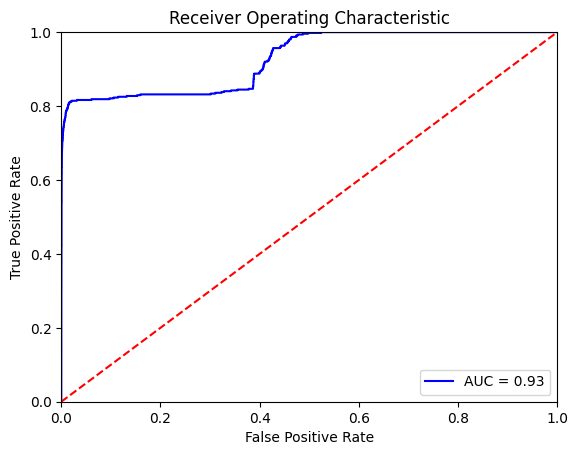

 ROC Curve for KNN


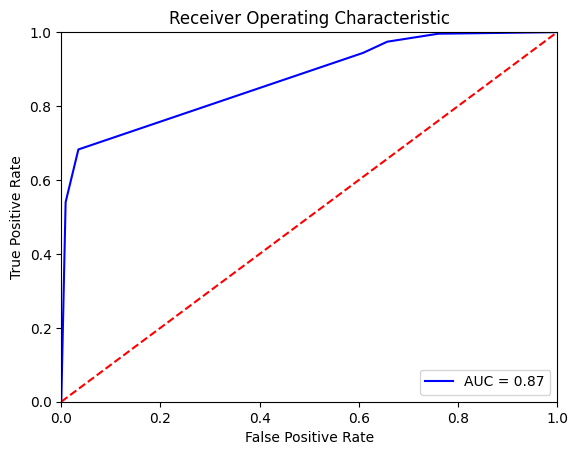

 ROC Curve for SVM


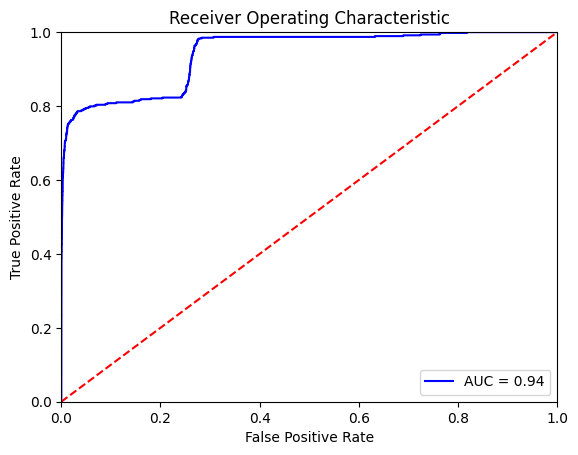

 ROC Curve for NaiveBayes


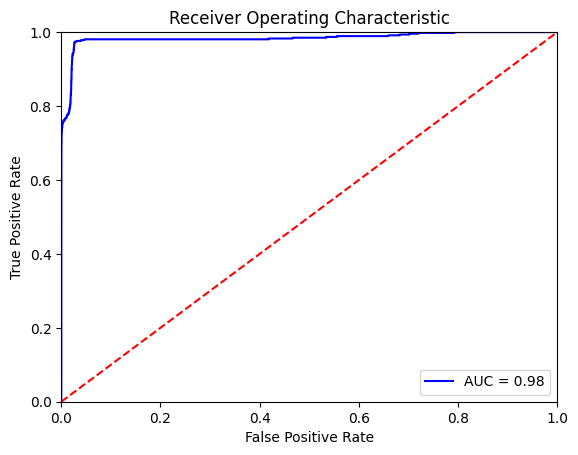

 ROC Curve for DT


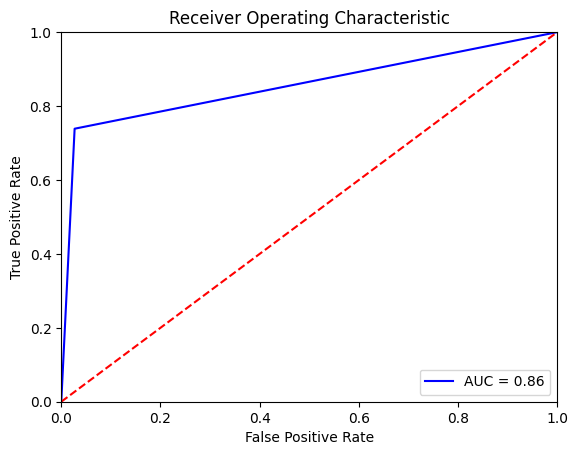

 ROC Curve for RF


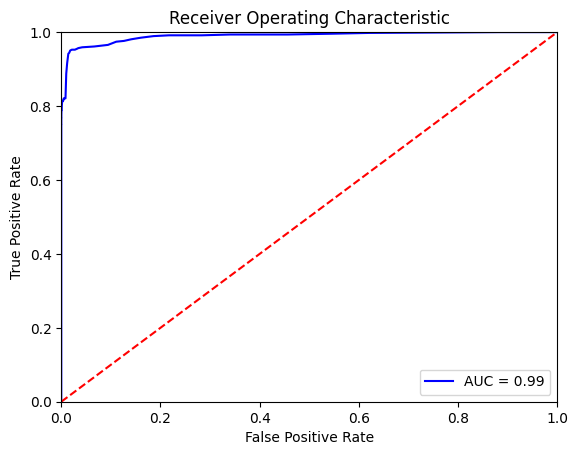

In [31]:
# Getting all the ROC curves
for name, model_detail in List_Classification_Models:
    print(f" ROC Curve for {name}")
    model = model_detail.fit( x_train, y_train)
    if name == "SVM":
        preds = np.array(model.decision_function(x_valid))
    else:
        model_pred_prob= model.predict_proba(x_valid)
        preds = model_pred_prob[:,1]

    fpr, tpr, threshold = metrics.roc_curve(y_valid, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()